# TOPIC: DWELLING TYPE

## Summary
This dataset provides Census 2021 estimates that classify dwellings in England and Wales by whether they are a shared or unshared dwelling, with shared dwellings further categorised by the number of household spaces in each dwelling. The estimates are as at Census Day, 21 March 2021. The link of the datasets: https://www.ons.gov.uk/datasets/RM205/editions/2021/versions/2#get-data

## Variable and dataset information
### Area type
Census 2021 statistics are published for a number of different geographies. These can be large, for example the whole of England, or small, for example an output area (OA), the lowest level of geography for which statistics are produced. For higher levels of geography, more detailed statistics can be produced. When a lower level of geography is used, such as output areas (which have a minimum of 100 persons), the statistics produced have less detail. This is to protect the confidentiality of people and ensure that individuals or their characteristics cannot be identified.

### Lower tier local authorities
Lower tier local authorities provide a range of local services. There are 309 lower tier local authorities in England made up of 181 non-metropolitan districts, 59 unitary authorities, 36 metropolitan districts and 33 London boroughs (including City of London). In Wales there are 22 local authorities made up of 22 unitary authorities.

## Metadata:

1.  Lower-tier local authorities (LTLAs): Identifies the region (e.g., Hartlepool, Middlesbrough).

2.  Dwelling Type Classification:

a. Shared dwelling with two household spaces

b. Shared dwelling with three or more household spaces

c. Unshared dwelling

3. Observation Counts: Number of recorded dwellings per classification.

Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

In [2]:
# Load the Excel file
df = pd.read_csv(r"C:\Users\OWOADE BAMIDELE\Desktop\projects\emmanuel.elaho@gmail.com\data\RM205-2021-2.csv")
df.head(20)

,Lower tier local authorities Code,Lower tier local authorities,Number of household spaces in shared dwellings (3 categories) Code,Number of household spaces in shared dwellings (3 categories),Observation
0,E06000001,Hartlepool,1,Shared dwelling: Two household spaces,0
1,E06000001,Hartlepool,2,Shared dwelling: Three or more household spaces,0
2,E06000001,Hartlepool,3,Unshared dwelling,44316
3,E06000002,Middlesbrough,1,Shared dwelling: Two household spaces,2
4,E06000002,Middlesbrough,2,Shared dwelling: Three or more household spaces,12
5,E06000002,Middlesbrough,3,Unshared dwelling,64019
6,E06000003,Redcar and Cleveland,1,Shared dwelling: Two household spaces,1
7,E06000003,Redcar and Cleveland,2,Shared dwelling: Three or more household spaces,3
8,E06000003,Redcar and Cleveland,3,Unshared dwelling,65538
9,E06000004,Stockton-on-Tees,1,Shared dwelling: Two household spaces,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 5 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Lower tier local authorities Code                                   993 non-null    object
 1   Lower tier local authorities                                        993 non-null    object
 2   Number of household spaces in shared dwellings (3 categories) Code  993 non-null    int64 
 3   Number of household spaces in shared dwellings (3 categories)       993 non-null    object
 4   Observation                                                         993 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.9+ KB


In [4]:
df.isnull().sum()

Lower tier local authorities Code                                     0
Lower tier local authorities                                          0
Number of household spaces in shared dwellings (3 categories) Code    0
Number of household spaces in shared dwellings (3 categories)         0
Observation                                                           0
dtype: int64

In [5]:
# Define the columns to analyze
columns_to_check = [
    'Lower tier local authorities', 
    'Number of household spaces in shared dwellings (3 categories)', 
    'Observation'
]

# Loop through each column and display the frequency and percentage
for col in columns_to_check:
    print(f"\nColumn: {col}")
    freq_table = df[col].value_counts(dropna=False)  # Count occurrences, including NaNs
    percentage = (freq_table / len(df)) * 100  # Calculate percentage
    
    # Combine frequency and percentage into a DataFrame for better readability
    result = pd.DataFrame({'Count': freq_table, 'Percentage (%)': percentage.round(2)})
    
    # Display the result
    print(result)


Column: Lower tier local authorities
                              Count  Percentage (%)
Lower tier local authorities                       
Merthyr Tydfil                    3             0.3
Hartlepool                        3             0.3
Middlesbrough                     3             0.3
Redcar and Cleveland              3             0.3
Stockton-on-Tees                  3             0.3
...                             ...             ...
Leicester                         3             0.3
Derby                             3             0.3
York                              3             0.3
North Lincolnshire                3             0.3
North East Lincolnshire           3             0.3

[331 rows x 2 columns]

Column: Number of household spaces in shared dwellings (3 categories)
                                                    Count  Percentage (%)
Number of household spaces in shared dwellings ...                       
Shared dwelling: Two household spaces      

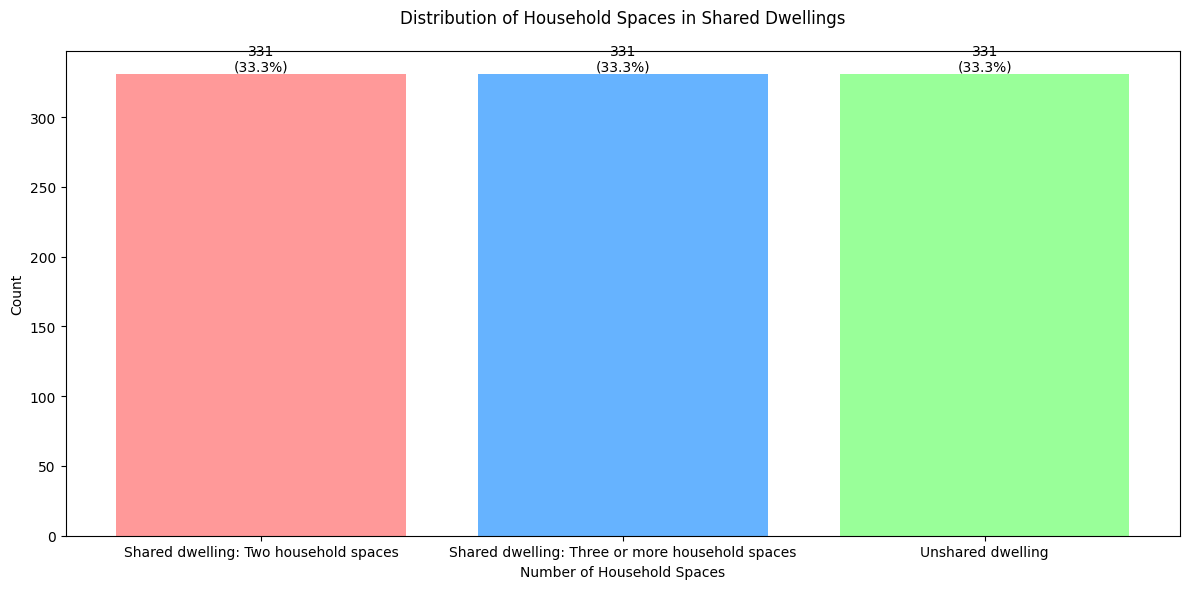

In [6]:
# Calculate frequencies and percentages
results = df['Number of household spaces in shared dwellings (3 categories)'].value_counts()
percentages = (results / len(df)) * 100

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(results.index.astype(str), 
               results.values,
               color=['#ff9999', '#66b3ff', '#99ff99'])

plt.title('Distribution of Household Spaces in Shared Dwellings', pad=20)
plt.xlabel('Number of Household Spaces')
plt.ylabel('Count')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    percentage = (height/len(df)) * 100
    plt.text(bar.get_x() + bar.get_width()/2., 
            height,
            f'{int(height)}\n({percentage:.1f}%)',
            ha='center', 
            va='bottom')

plt.tight_layout()
plt.show()

Lowest 10 local authorities based on 'Number of household spaces in shared dwellings (3 categories) Code':
    Lower tier local authorities  \
9               Stockton-on-Tees   
12                    Darlington   
15                        Halton   
978                      Torfaen   
363                      Dacorum   
366                    Hertsmere   
336                      Fareham   
339                      Gosport   
342                         Hart   
345                       Havant   

     Number of household spaces in shared dwellings (3 categories) Code  
9                                                    1                   
12                                                   1                   
15                                                   1                   
978                                                  1                   
363                                                  1                   
366                                                 

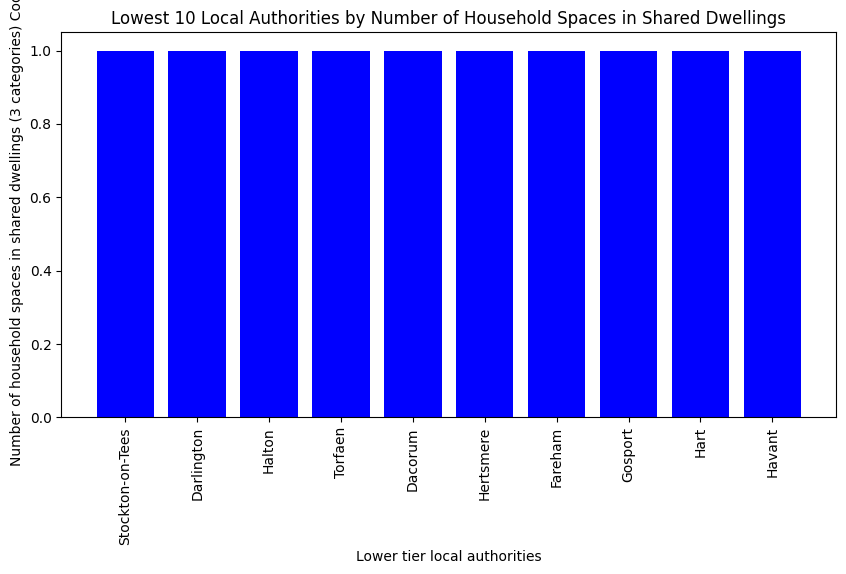

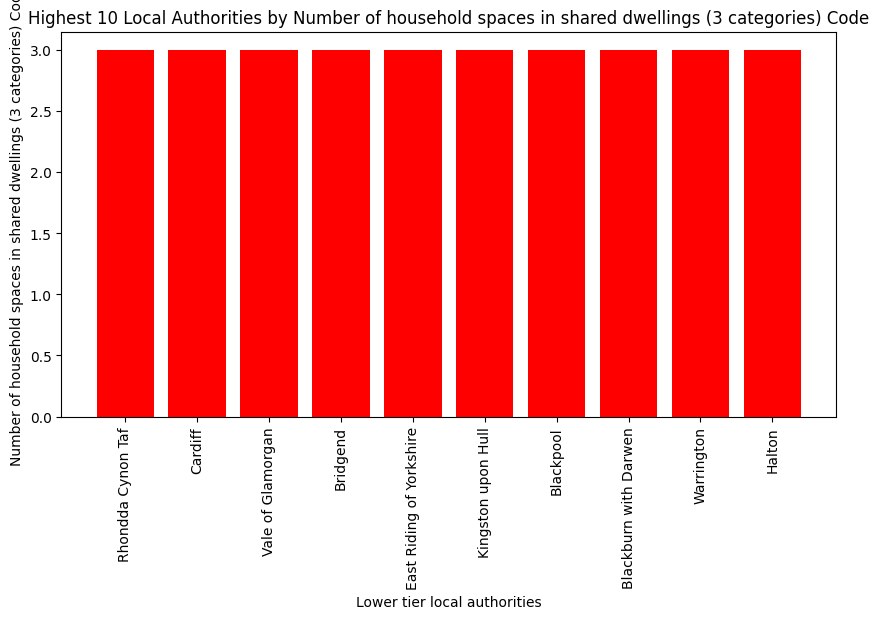

In [7]:
# Convert the relevant column to numeric, errors='coerce' will turn non-numeric values into NaN
df['Number of household spaces in shared dwellings (3 categories) Code'] = pd.to_numeric(df['Number of household spaces in shared dwellings (3 categories) Code'], errors='coerce')

# Drop rows with NaN values in 'Number of household spaces'
df = df.dropna(subset=['Number of household spaces in shared dwellings (3 categories) Code'])

# Sort the dataframe by 'Number of household spaces'
df_sorted = df.sort_values(by='Number of household spaces in shared dwellings (3 categories) Code')

# Get the lowest 10 and highest 10 local authorities
lowest_10 = df_sorted.head(10)
highest_10 = df_sorted.tail(10)

# Print the results
print("Lowest 10 local authorities based on 'Number of household spaces in shared dwellings (3 categories) Code':")
print(lowest_10[['Lower tier local authorities', 'Number of household spaces in shared dwellings (3 categories) Code']])

print("\nHighest 10 local authorities based on 'Number of household spaces in shared dwellings (3 categories) Code':")
print(highest_10[['Lower tier local authorities', 'Number of household spaces in shared dwellings (3 categories) Code']])

# Plotting the lowest 10
plt.figure(figsize=(10, 5))
plt.bar(lowest_10['Lower tier local authorities'], lowest_10['Number of household spaces in shared dwellings (3 categories) Code'], color='blue')
plt.xlabel('Lower tier local authorities')
plt.ylabel('Number of household spaces in shared dwellings (3 categories) Code')
plt.title('Lowest 10 Local Authorities by Number of Household Spaces in Shared Dwellings')
plt.xticks(rotation=90)
plt.show()

# Plotting the highest 10
plt.figure(figsize=(10, 5))
plt.bar(highest_10['Lower tier local authorities'], highest_10['Number of household spaces in shared dwellings (3 categories) Code'], color='red')
plt.xlabel('Lower tier local authorities')
plt.ylabel('Number of household spaces in shared dwellings (3 categories) Code')
plt.title('Highest 10 Local Authorities by Number of household spaces in shared dwellings (3 categories) Code')
plt.xticks(rotation=90)
plt.show()


The histogram shows two bar charts comparing local authorities in the UK based on the "Number of household spaces in shared dwellings (3 categories) Code."

The top chart displays the lowest 10 local authorities using blue bars. All bars appear to be of equal height at value 1.0, suggesting that these authorities (Stockton-on-Tees, Darlington, Halton, Tortean, Dacorum, Hertsmere, Fareham, Gosport, Hart, and Havant) all have the same category code of 1 for shared dwelling spaces. This corresponds with the data shown in the previous text, where these authorities had the lowest actual numbers but were all assigned code 1.

The bottom chart shows the highest 10 local authorities using red bars. Again, all bars are of equal height at value 3.0, indicating that these authorities (Rhondda Cynon Taf, Cardiff, Vale of Glamorgan, Bridgend, East Riding of Yorkshire, Kingston upon Hull, Blackpool, Blackburn with Darwen, Warrington, and Halton) all have the same category code of 3. This also matches the previous data where these authorities had significantly higher numbers of shared dwelling spaces.

Interestingly, Halton appears in both charts, suggesting either an error in the data or that there might be different classifications or time periods being measured between the two charts. The y-axis shows that these values represent categorical codes (1 and 3) rather than the actual counts of shared dwelling spaces.

Both charts label the x-axis as "Lower tier local authorities," which indicates these are district-level authorities in the UK's local government structure. The visualization effectively illustrates how these authorities are grouped into different categories based on their shared dwelling statistics, though it doesn't show the actual numerical differences between them.

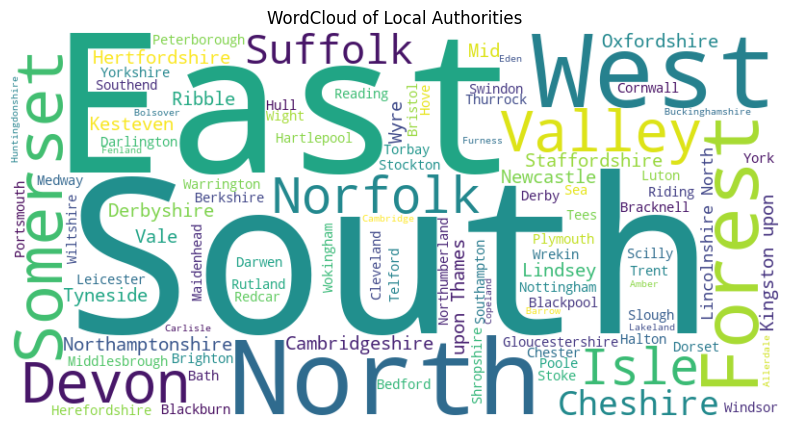

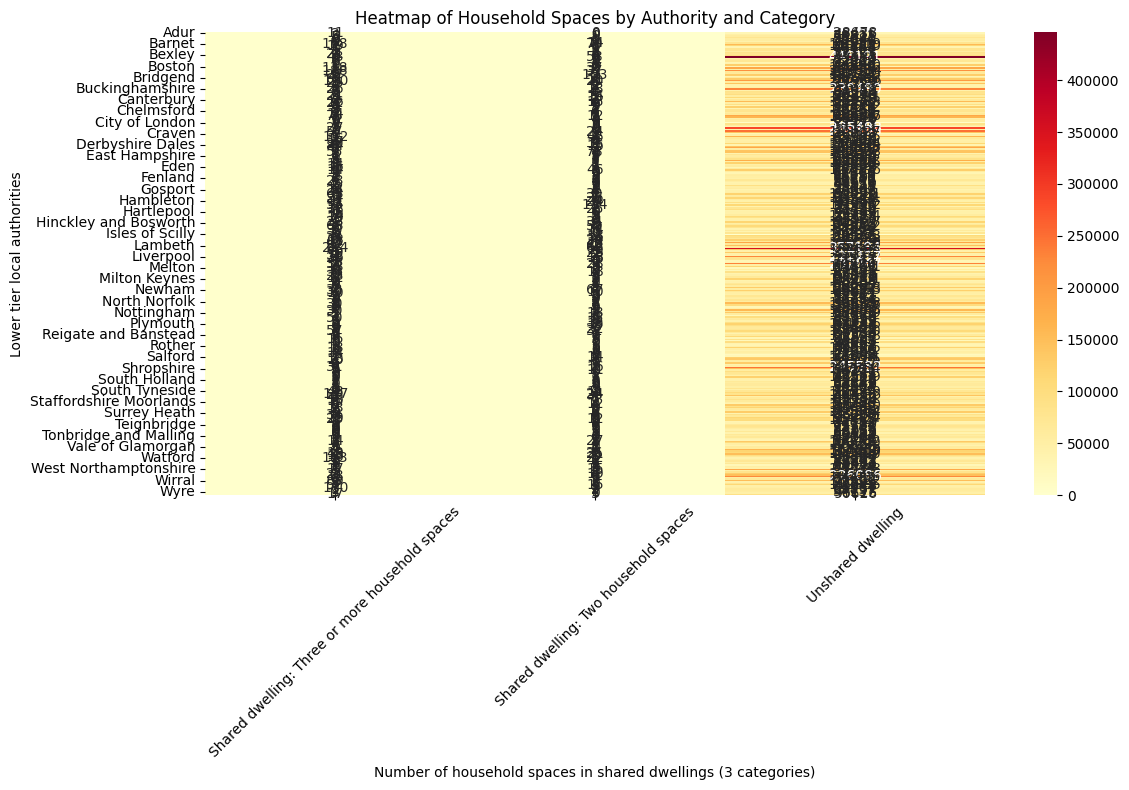

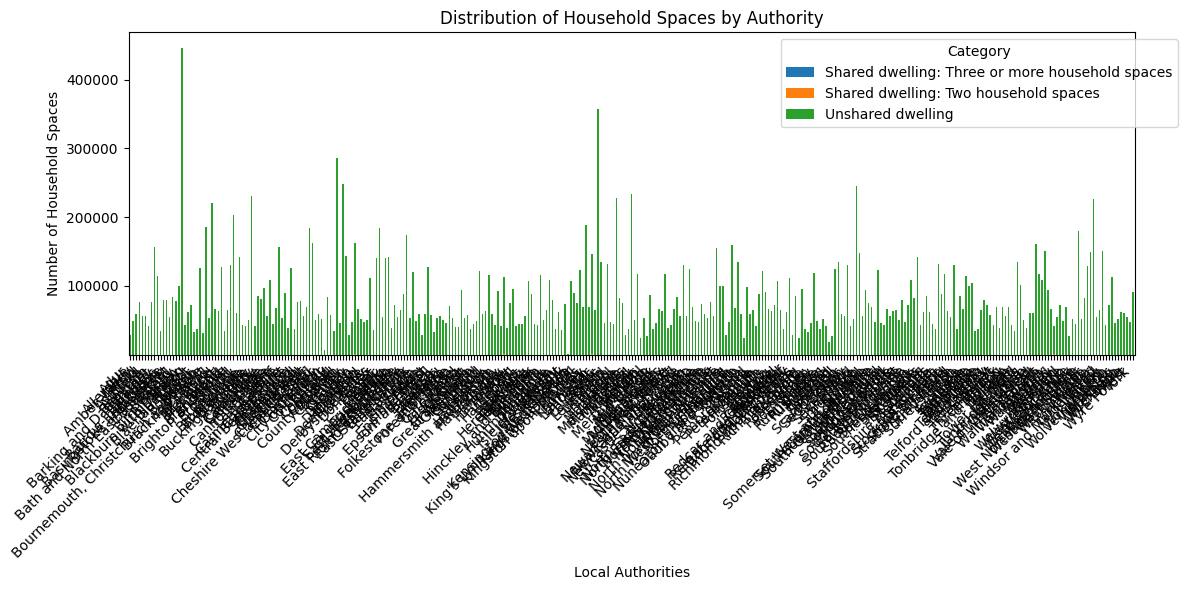

C:\Users\OWOADE BAMIDELE\AppData\Local\Temp\ipykernel_26704\2112290972.py:86: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


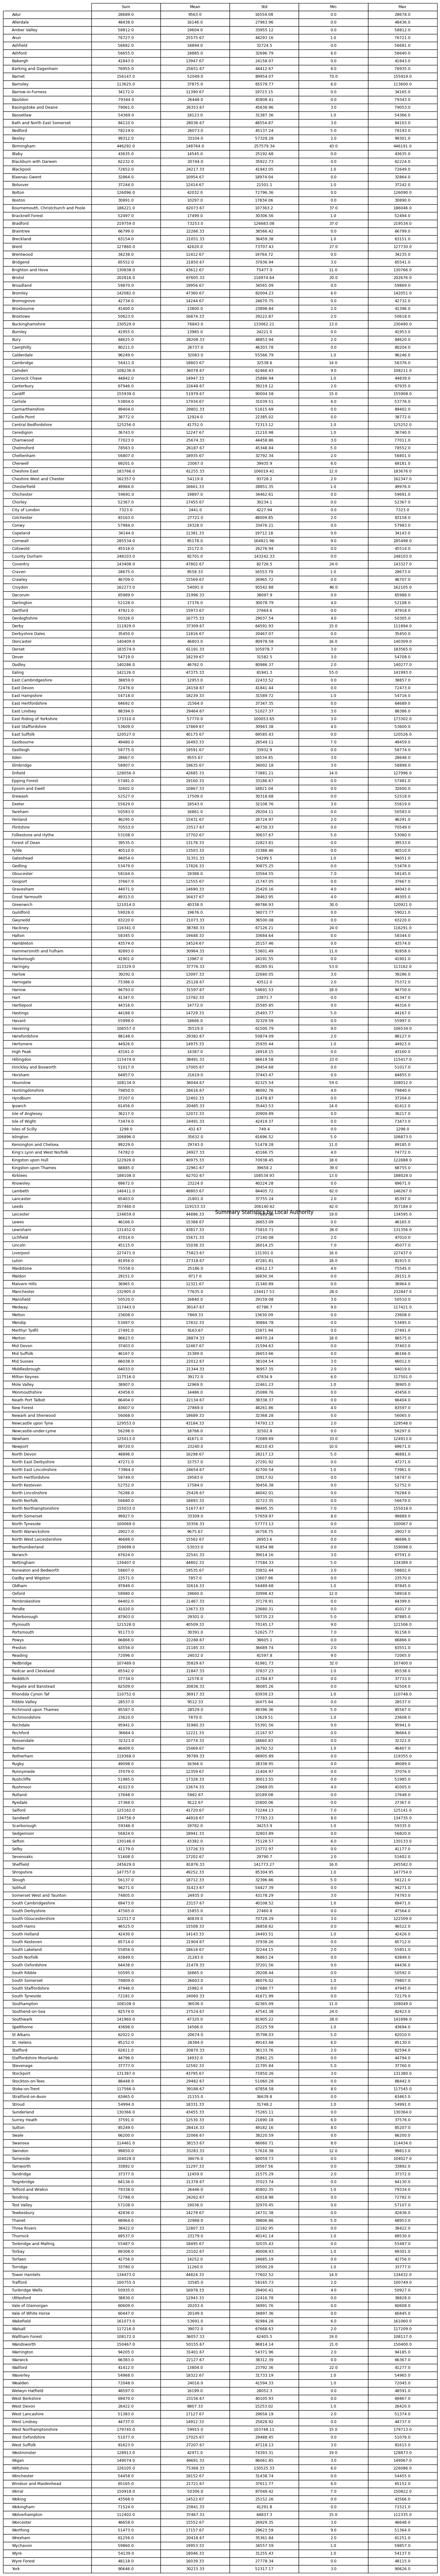

In [ ]:
# 1. WordCloud for Local Authorities
def create_wordcloud():
    # Combine all authority names with frequency
    text = ' '.join(df['Lower tier local authorities'])
    
    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         max_words=100).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud of Local Authorities')
    plt.show()

# 2. Advanced Heatmap of Household Spaces by Authority
def create_heatmap():
    # Pivot table for heatmap
    pivot_data = df.pivot_table(
        values='Observation',
        index='Lower tier local authorities',
        columns='Number of household spaces in shared dwellings (3 categories)',
        aggfunc='sum'
    )
    
    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title('Heatmap of Household Spaces by Authority and Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Stacked Bar Chart with Matplotlib
def create_stacked_bar():
    # Prepare data for stacked bar
    pivot_data = df.pivot_table(
        values='Observation',
        index='Lower tier local authorities',
        columns='Number of household spaces in shared dwellings (3 categories)',
        aggfunc='sum'
    )
    
    # Create stacked bar chart
    ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Distribution of Household Spaces by Authority')
    plt.xlabel('Local Authorities')
    plt.ylabel('Number of Household Spaces')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# 4. Summary Statistics Table using Matplotlib
def create_summary_table():
    # Create summary statistics
    summary = df.groupby('Lower tier local authorities').agg({
        'Observation': ['sum', 'mean', 'std', 'min', 'max']
    }).round(2)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('tight')
    ax.axis('off')
    
    # Create table
    table = ax.table(cellText=summary.values,
                    rowLabels=summary.index,
                    colLabels=['Sum', 'Mean', 'Std', 'Min', 'Max'],
                    cellLoc='center',
                    loc='center')
    
    # Adjust table properties
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    plt.title('Summary Statistics by Local Authority')
    plt.tight_layout()
    plt.show()

# Run all visualizations
create_wordcloud()
create_heatmap()
create_stacked_bar()
create_summary_table()

The graph  1 shows a word cloud visualization of local authorities in the United Kingdom. The word cloud uses varying font sizes and colors to represent different local authorities, with larger text indicating greater prominence or significance in the dataset.
The most dominant terms in the visualization are regional descriptors like "East," "South," "North," "West," and "Suffolk," which appear in the largest font sizes. These likely represent broader regional divisions or areas with numerous local authorities.
Many specific local authorities are visible throughout the word cloud, including urban centers like "Newcastle," "Derby," "York," and "Kingston upon Hull," as well as more rural counties like "Norfolk," "Cornwall," "Derbyshire," and "Oxfordshire."
Several valley regions are represented, with "Vale" appearing prominently, likely referring to areas like Vale of Glamorgan that appeared in the previous data about household spaces in shared dwellings.
Local authorities that were mentioned in the previous charts and data are present, including "Darlington," "Halton," "Stockton," "Tees" (likely part of Stockton-on-Tees), "Blackburn," and "Darwen" (likely part of Blackburn with Darwen).
The varied color scheme uses greens, purples, blues, and yellows to help differentiate between the different authorities, though the coloring doesn't appear to represent any specific categorization or data values.
This visualization effectively displays the geographic diversity of local authorities across the UK, highlighting both metropolitan areas and rural counties, and gives a sense of the complex administrative divisions within the country's local government structure.

This graph 2 displays a heatmap titled "Heatmap of Household Spaces by Authority and Category" that visualizes housing data across numerous local authorities in the UK. The vertical axis lists a wide range of lower tier local authorities alphabetically, from Adur at the top to Wyre at the bottom, including authorities previously mentioned in earlier charts such as Gosport, Hartlepool, and Vale of Glamorgan. The horizontal axis shows three distinct categories of household spaces: "Shared dwelling: Three or more household spaces," "Shared dwelling: Two household spaces," and "Unshared dwelling." The color intensity represents the number of household spaces in each category, with a color scale on the right ranging from pale yellow (approximately 0) to dark burgundy (approximately 400,000), measuring the count of household spaces. A striking pattern is immediately visible: the first two categories (shared dwellings with three or more spaces, and shared dwellings with two spaces) show very low values across all authorities, represented by pale yellow coloring with small numerical values overlaid on the cells. This indicates that shared dwellings are relatively uncommon across all these local authorities. In stark contrast, the "Unshared dwelling" category shows significantly higher values, represented by darker orange and yellow shades, with much larger numbers visible on the cells. This clearly demonstrates that unshared dwellings are vastly more common than shared dwellings across all authorities. Some authorities such as City of London, Liverpool, and Birmingham appear to have higher concentrations of unshared dwellings, shown by deeper orange coloring in the rightmost column. This visualization provides comprehensive evidence that across the UK's local government landscape, unshared dwellings overwhelmingly predominate, while shared dwellings represent only a small fraction of the housing stock, regardless of geographic location or authority type.

This graph 3 titled "Distribution of Household Spaces by Authority" presents a detailed breakdown of housing types across numerous local authorities in the UK. The vertical axis measures the "Number of Household Spaces," ranging from 0 to over 400,000, while the horizontal axis lists all the local authorities, though many labels overlap and are difficult to read due to the high number of authorities displayed. The data is organized into three categories as shown in the legend: "Shared dwelling: Three or more household spaces" (blue), "Shared dwelling: Two household spaces" (orange), and "Unshared dwelling" (green). The most striking observation is the overwhelming dominance of unshared dwellings (green bars) across all authorities. These green bars vary considerably in height, indicating significant differences in the total housing stock between authorities. Several authorities stand out with particularly high numbers of unshared dwellings, with peaks reaching approximately 450,000, 350,000, and 250,000 household spaces.
In stark contrast, the blue and orange bars representing shared dwellings are barely visible at the bottom of the chart, appearing as thin lines that are almost indistinguishable from the x-axis. This dramatically illustrates how uncommon shared dwellings are compared to unshared dwellings across all local authorities. Some of the taller green bars likely represent larger urban areas or more populated districts, while the shorter bars would correspond to smaller or more rural authorities. A few authorities appear to have significantly larger housing stocks than others, with approximately 5-7 authorities showing notably higher green bars. This visualization reinforces the findings from the previous heatmap, confirming that unshared dwellings constitute the vast majority of household spaces throughout the UK, while shared dwellings represent only a minimal fraction of the housing inventory regardless of location.